## Import the libraries

In [ ]:
## clone the github repository

In [ ]:
! git clone "https://github.com/misbah4064/yolo-license-plate-detection.git"


Cloning into 'yolo-license-plate-detection'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Receiving objects: 100% (56/56), 3.54 MiB | 21.44 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
%cd yolo-license-plate-detection

/content/yolo-license-plate-detection


In [ ]:
## download the weights

In [ ]:
!gdown https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc

Downloading...
From: https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc
To: /content/yolo-license-plate-detection/model.weights
100% 245M/245M [00:02<00:00, 104MB/s]


In [ ]:
## creating object detector function

In [ ]:
import cv2
import numpy as np

def objectDetector(img):
    yolo = cv2.dnn.readNet("model.weights", "darknet-yolov3.cfg")
    classes = []

    with open("classes.names", "r") as file:
        classes = [line.strip() for line in file.readlines()]
    layer_names = yolo.getLayerNames()
    print(yolo.getUnconnectedOutLayers())
    output_layers = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]

    colorRed = (0,0,255)
    colorGreen = (0,255,0)
    colorWhite = (255,255,255)

    height, width, channels = img.shape

    # # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            cv2.rectangle(img, (x, y), (x + w, y + h), colorGreen, 3)
            cv2.putText(img, label, (x, y - 30), cv2.FONT_HERSHEY_PLAIN, 3, colorWhite, 2)
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[[32 23 20]
  [34 25 22]
  [31 26 23]
  ...
  [50 37 35]
  [53 38 36]
  [52 37 35]]

 [[35 26 23]
  [34 25 22]
  [28 23 20]
  ...
  [51 37 38]
  [52 36 37]
  [51 35 36]]

 [[33 25 25]
  [32 24 24]
  [30 25 22]
  ...
  [53 37 38]
  [51 35 36]
  [50 34 35]]

 ...

 [[26 30 25]
  [25 29 24]
  [25 28 26]
  ...
  [12 21 25]
  [14 20 27]
  [15 21 28]]

 [[26 30 24]
  [24 28 23]
  [24 28 23]
  ...
  [12 20 27]
  [14 20 27]
  [17 22 31]]

 [[29 33 27]
  [25 29 23]
  [24 28 23]
  ...
  [12 20 27]
  [15 20 29]
  [18 23 32]]]
[200 227 254]


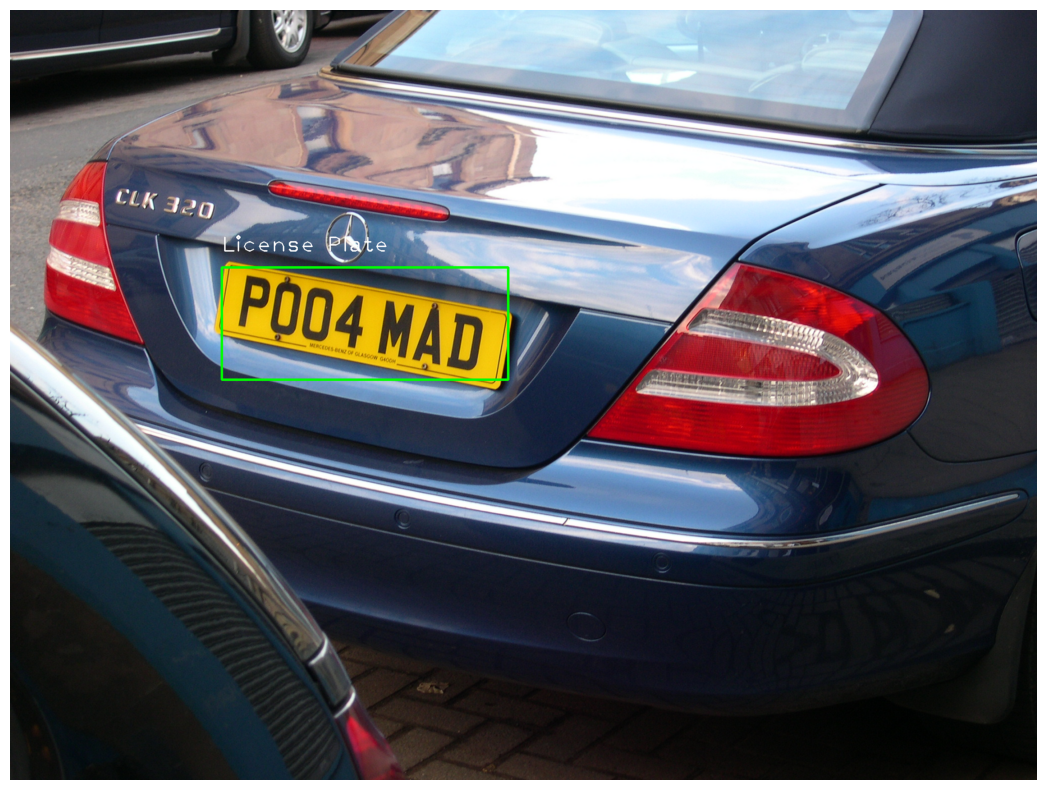

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

input_image = cv2.imread("funnynp.jpg")
print(input_image)
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()